In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. 


KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. 


In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. 


Therefore, we can immediately classify new data points as they present themselves.

## Code

Let’s take a look at how we could go about classifying data using the K-Nearest Neighbors algorithm in Python. 


For this tutorial, we’ll be using the breast cancer dataset from the sklearn.datasets module. 

We need to start by importing the proceeding libraries.

In [15]:
# import dataset and show feature names (contains 30 features in total)
breast_cancer = load_breast_cancer()
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
# only select 2 of the 30 features for KNN
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]  
X.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [17]:
# show target variable
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)  # malignant or benign
y

[malignant, malignant, malignant, malignant, malignant, ..., malignant, malignant, malignant, malignant, benign]
Length: 569
Categories (2, object): [malignant, benign]

In [27]:
# dummy-encode target variable
y = pd.get_dummies(y, drop_first=True)
y.head()

,benign
0,0
1,0
2,0
3,0
4,0


The dataset classifies tumors into two categories (malignant and benign) and contains something like 30 features. 


In the real world, you’d look at the correlations and select a subset of features that plays the greatest role in determining whether a tumor is malignant or not. 


However, for the sake of simplicity, we’ll pick a couple at random. We must encode categorical data for it to be interpreted by the model (i.e. malignant = 0 and benign = 1).

Some pros and cons of KNN
### Pros
- No assumptions about data
- Simple algorithm — easy to understand
- Can be used for classification and regression

### Cons
- High memory requirement — All of the training data must be present in memory in order to calculate the closest K neighbors
- Sensitive to irrelevant features
- Sensitive to the scale of the data since we’re computing the distance to the closest K points

In [19]:
# train/test-split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# The point of building a model, is to classify new data with undefined labels. 
# Therefore, we need to put aside data to verify whether our model 
# does a good job at classifying the data. 
# By default, train_test_split sets aside 25% of the samples in the original 
# dataset for testing.

The sklearn library has provided a layer of abstraction on top of Python. 


Therefore, in order to make use of the KNN algorithm, it’s sufficient to create an instance of KNeighborsClassifier. 


By default, the KNeighborsClassifier looks for the 5 nearest neighbors. 


We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # same as defaults: p=2, metric='minkowski'
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

In [35]:
data=X_test.join(y_test, how='outer')
data.head()

,mean area,mean compactness,benign
421,656.1,0.18360,1
47,534.6,0.12310,0
292,513.7,0.07943,1
186,1041.0,0.08468,0
414,719.5,0.04605,0


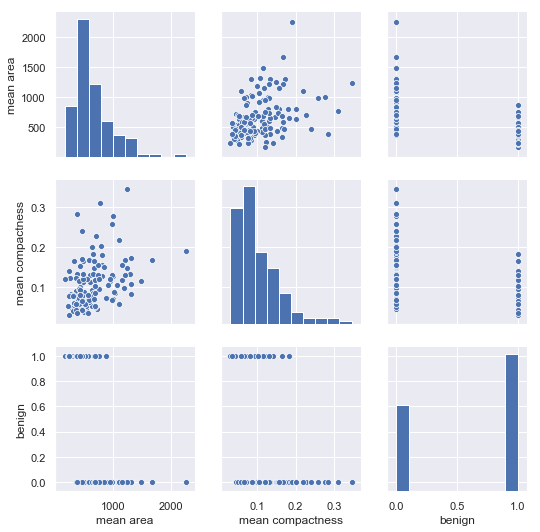

In [37]:
sns.pairplot(data);
# For some reason my Jupyter has not been displaying the scatter plot. Lets see if it worls for you. 

In [38]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

 Given our confusion matrix, our model has an accuracy of 121/143 = 84.6%.

In [40]:
# check again accuracy with sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).round(3)

0.846

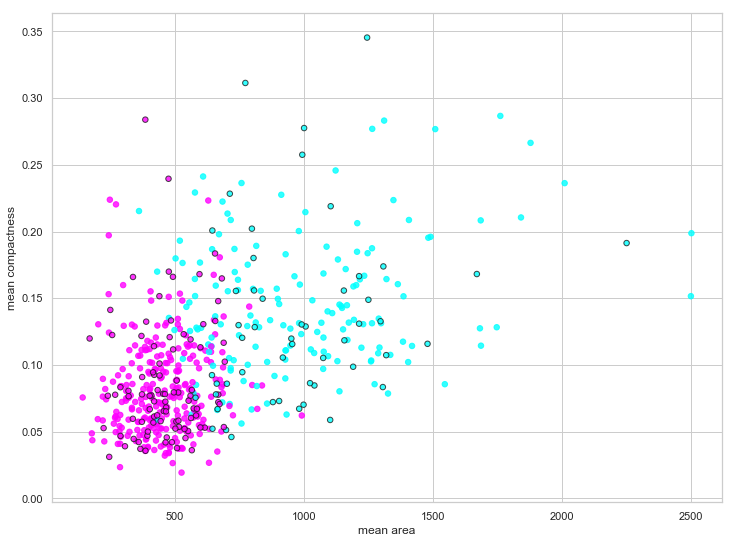

In [64]:
# check predicted values by plotting (without border = training data, with border = predicted data)

fig, ax = plt.subplots(figsize=(12,9))
#ax.set_facecolor('white')
sns.set(style='white')

# training points
plt.scatter(X_train['mean area'],X_train['mean compactness'],
            c = y_train.values.ravel(), s=30, cmap='cool', alpha=0.8)

# predicted points
plt.scatter(X_test['mean area'],X_test['mean compactness'],
            c=y_pred,s=30, cmap='cool', alpha=0.8, edgecolor='k')

plt.xlabel('mean area')
plt.ylabel('mean compactness');